# **introduction**

I am Gavriel Michaeli (209283720) ,computer science student who is passionate about data science.Since I work in the field of cars and I really like cars, I chose to do my project in this field.


# **The problem we deal with**

At a time when almost every family has a car and there is a high frequency of changing cars, many people wonder what the correct car price they should ask or a much time it will take to sell the car, or conversely what the real price of the car they want to buy . Most of the time people can search for vehicles similar to what they want to buy, but they won't always find one or they won't be able to get a correct price estimate.

I decided to solve this problem and put an end to this problem by building a smart AI model that will solve it.

# **About the project**

In this project we will use a database that we have on vehicle features, such as: company, type, time of sale, price and more, in order to predict the prices of the vehicles and the range of the time it will take to sell them.

First we will clean the data, after that we will present the data in a graphic display from which we can learn things about the data and the vehicles.
In addition, we will use PCA so that we can better understand the information we have and from which we can learn how to bulid the AI models.

 After that, an **ANN** model will be built in order to predict the time of the sales period and will be compared with a ready ANN model.
 
 And finally we will use models to predict the price of the vehicle and the SHAP values ​​in order to see what affects the prices of the vehicle mainly.

# **later in the project**

Later on in the project,I will check the cleaning process and see how can i impove that.

Also I would like to add more graphs that will show the different car companies and which company actually sells the most.
In addition, we would like to see what the average price is for the 20 best-selling companies.
We would like to add more graphs that will eventually show the buyers or sellers what they should buy or how much they should sell for, and for the buyers which car will ultimately be the most worthwhile for them to buy so that whenever they want to sell the car it will be easier for them.


In addition, I want to see from the models we built which variable most affects the price.

In the end we would like to obtain for each vehicle what is the average time it will take to sell and what is the appropriate price for which he should sell the vehicle, or what is the correct price that someone should pay for his vehicle.

# **Exploratory Data Analysis**

Now let's export the data set into pandas dataframe,and import the libraries we will use.

In [53]:
from google.colab import files
import pandas as pd
import numpy as np
import io
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [71]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['cars1.csv']))

Saving cars1.csv to cars1 (2).csv


# **The data**

In [ ]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,490


As we mentioned in the introduction, the data has 38531 rows and 18 columns

# **First let's clean the data**

first we will drop all Nan values or empty values:


In [70]:
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

now we will check if there are duplicated rows

In [4]:
df[df.duplicated()].shape[0]

48

we will drop all duplicated

In [5]:
df = df.drop_duplicates()

Now lets see what is the min and max value fot the price, and let's check how much they appear

In [ ]:
print(f'min value for the price={df["price_usd"].min()}')
print(f'max value for the price={df["price_usd"].max()}')
print(f'the min value appears:{df[df["price_usd"]==df["price_usd"].min()].shape[0]} times')
print(f'the max value appears:{df[df["price_usd"]==df["price_usd"].max()].shape[0]} times')
print(f'there price between{df["price_usd"].value_counts(bins=[40000,50000])}')
print(f'prive between{df["price_usd"].value_counts(bins=[0,100])}')
print(f'price between{df["price_usd"].value_counts(bins=[0,200])}')

min value for the price=104.33
max value for the price=39999.0
the min value appears:2 times
the max value appears:1 times
there price betweenSeries([], Name: price_usd, dtype: int64)
prive betweenSeries([], Name: price_usd, dtype: int64)
price between(-0.001, 200.0]    93
Name: price_usd, dtype: int64


We see that between 0-100 and 40000-50000 there are less values .so let's update the price to be in better range

The reason we are doing the cleaning of the data is because in the section of building a machine learning model the cars that fall to far apart from the mean value of price cause problems and decrease the accuracy of the model. it happans because that there are not enough edge cases in order to build accurate model for them.

In [ ]:
#i need to check this because maybe it ok to not do this. ,aybe it is better to do it by number of cars per year.
not_to_cheap = df["price_usd"] > 100
not_to_expensive= df["price_usd"] < 40000
df = df.where(not_to_cheap & not_to_expensive).dropna()
df = df.where(not_to_expensive).dropna()
print(df["price_usd"].value_counts(bins=[40000,50000]))

Series([], Name: price_usd, dtype: int64)


In [ ]:
len(df)

38332

We have 38332. This means we deleted 199 rows, which is fine and not a lot compared to our amount of data

# **Visualising The Data**((i will add more)

Visualization using graphs can teach us a lot about our data. In this part we will try to understand what is in our data by means of different graphs and deduce from it things that can help us in the future and even others in the future who want to buy or sell a car.



In [56]:
import matplotlib.pyplot as plt; 
import seaborn as sns

**First let's start with a few pieces of information that every seller or buyer will want to know when buying or selling a car.**


The first thing that can surely interest every person is what is the average time it takes to sell a car from each company.
From this information, the buyer or seller will receive information about the average time it takes to sell a car or, for the buyer, how long it will take him to sell a car in the future.

lets plot The 10 fastest selling companies.

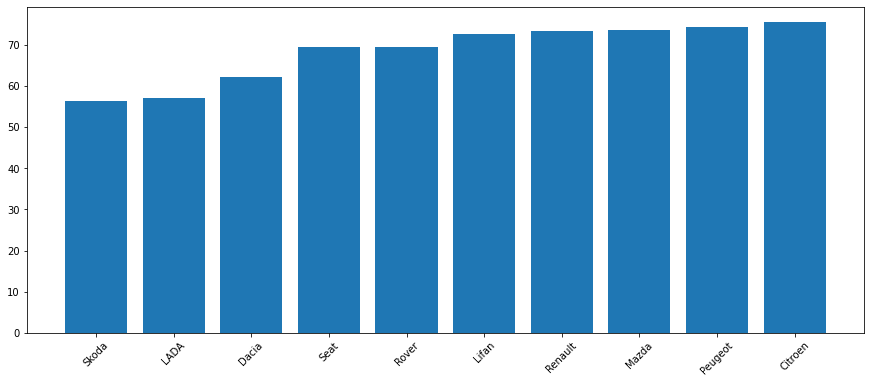

In [ ]:
time_avg={}
comp=list(df["manufacturer_name"].unique())
for x in comp:
  df_comp=df[df["manufacturer_name"]==x]
  time_avg[x]=(df_comp["duration_listed"].sum())/df_comp.shape[0]
time_avg={k: v for k, v in sorted(time_avg.items(), key=lambda item: item[1])}

company = list(time_avg.keys())
time_sell = list(time_avg.values())
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
plt.bar(range(10), time_sell[0:10], tick_label=company[0:10])
plt.show()

From here we see that the car that sells the fastest is Skoda.
Which could indicate that there is a lot of demand for this car. And of course from here we see the 10 vehicles that sell the fastest, and it is also clear that Skoda Dacia and Lada sell the fastest and then there is a bigger increase.

In [ ]:
sk=df["manufacturer_name"]=="Subaru"
ld=df["manufacturer_name"]=="LADA"
DC=df["manufacturer_name"]=="Dacia"
se=df["manufacturer_name"]=="Seat"
ro=df["manufacturer_name"]=="Rover"
li=df["manufacturer_name"]=="Lifan"
re=df["manufacturer_name"]=="Renault"
ma=df["manufacturer_name"]=="Mazda"
pe=df["manufacturer_name"]=="Peugeot"
ci=df["manufacturer_name"]=="Citroen"
df_fastest_sell = df.where(sk | ld | DC |se|re|li|re|ma|pe|ci).dropna()

Text(0.5, 1.0, 'The effect of color on sales speed')

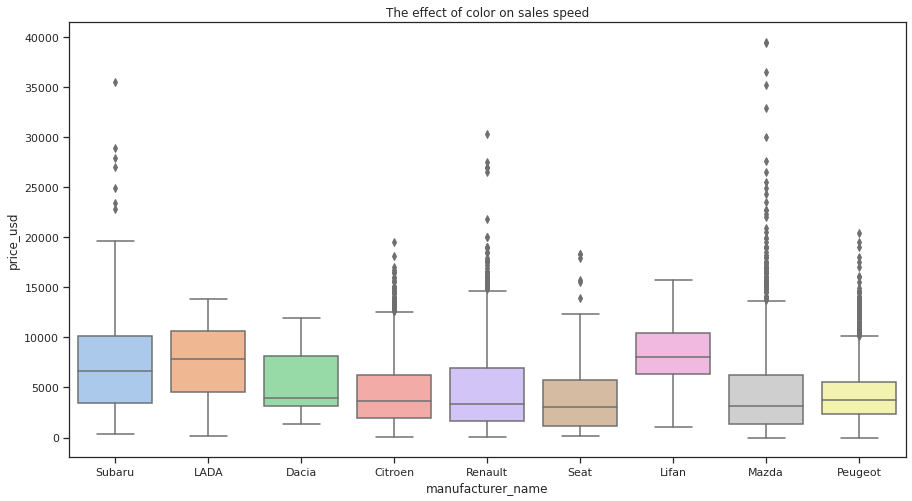

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="manufacturer_name", y="price_usd",data=df_fastest_sell)
plt.title('The effect of color on sales speed')

First let's explain the box plot : the line in the middle of each rectangle represents the median, the top line of the straight line represents 75% and the bottom line represents the 25th. Everything above and below the bounding lines are outliers points.

**Another thing that can be of interest to every buyer is what are the things that most affect the price of the car.**

Every buyer who comes to buy a car should know what the thing that affects
the price of the vehicle.
Does a high engine volume affect the price,
Does the amount of kilometers a car has traveled affect the price and more.
Let's check what are these factors that affect the price.



First let's see the effect of the kilometes on the price of the car.

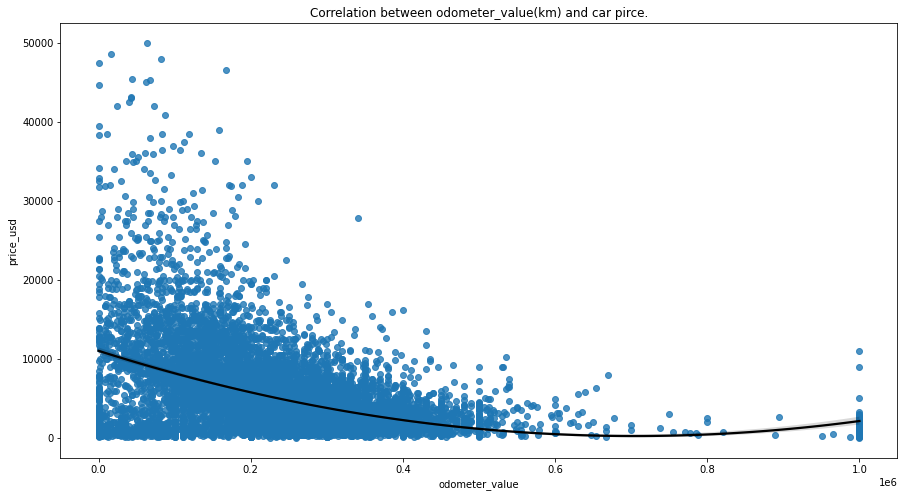

In [ ]:
plt.figure(figsize=(15,8))

plt.title('Correlation between odometer_value(km) and car pirce.')
df_plt = df.head(10000)

ax = sns.regplot(x="odometer_value", y="price_usd", data=df_plt, 
                 line_kws={"color": "black"},order=2)

As you can see, there is a correlation between the price and the km that the vehicle travels up to a certain limit, which means that if the odometer value is higher than the price is lower, sow if a buyer wants to buy a car he needs to know that the odometer vakue really effects the price.


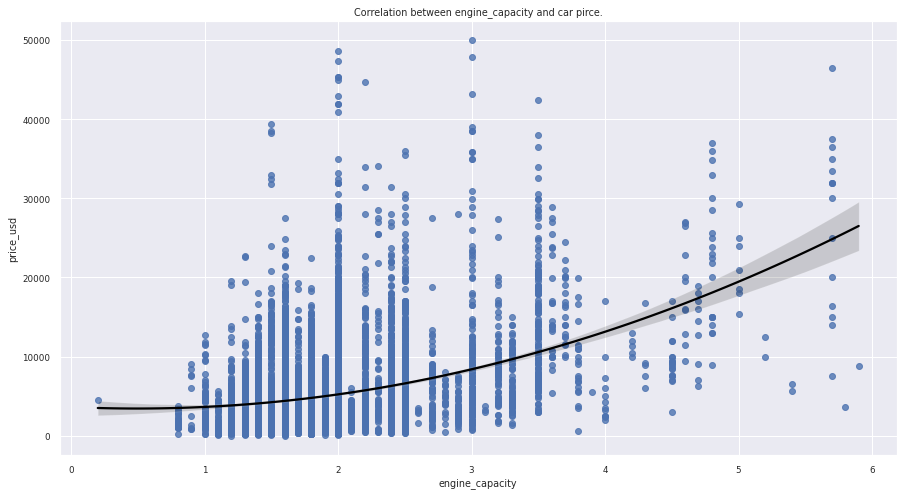

In [ ]:
plt.figure(figsize=(15,8))

plt.title('Correlation between engine_capacity and car pirce.')
df_plt = df.head(10000)

ax = sns.regplot(x="engine_capacity", y="price_usd", data=df_plt, 
                 line_kws={"color": "black"},order=2)

Now a very interesting detail would be to check the effect of the year of the vehicle on the price.
As most of us might think, the older a car is, the cheaper it is compared to the same car in later years,
But is this really true for every year?
Let's check it out

Now let's plot the average price of the vehicles each year in order to see how it really affects

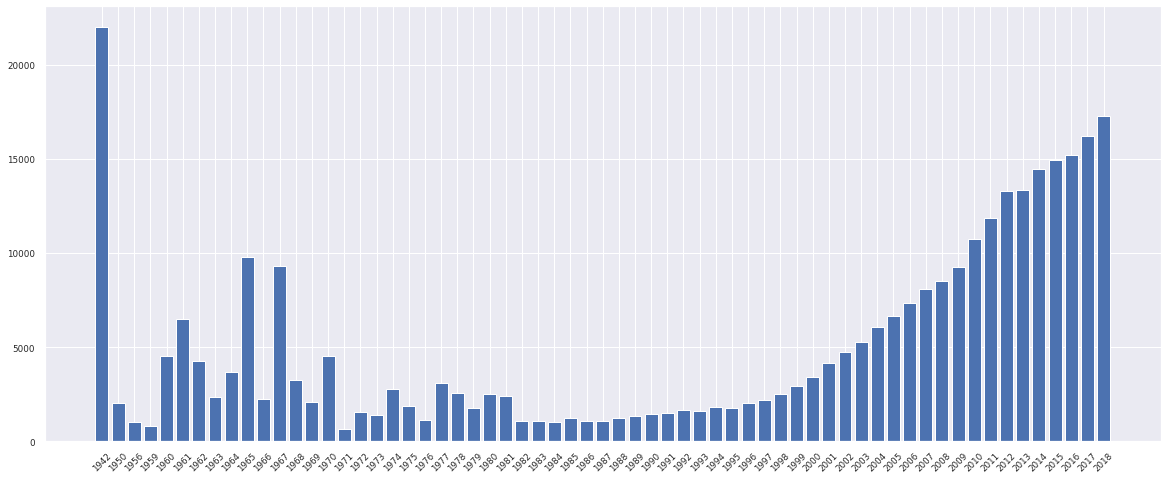

In [ ]:
price_avg={}
min_year=df.year_produced.min()
max_year=df.year_produced.max()
for num in range(min_year.astype(int),max_year.astype(int)):
  df_year=df[df.year_produced==num]
  mean=df_year.price_usd.mean()
  if mean>0:
    price_avg[num]=mean
years = list(price_avg.keys())
price_year = list(price_avg.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.bar(range(len(price_avg)), price_year, tick_label=years)
plt.show()

Wow, we see here that although starting in 1982 there is an increase every year in the price of the car and there is a correlation after 1982.
But before 1982 it is impossible to say clearly that there is a connection between the year of the vehicle and the price of the vehicle.
Let's try to understand why this happens and try to understand why it is.

First of all let's see how many vehicles from each year there are,
Between the years 1942-1981, so that we know whether it is several vehicles that affect the price or just a few.

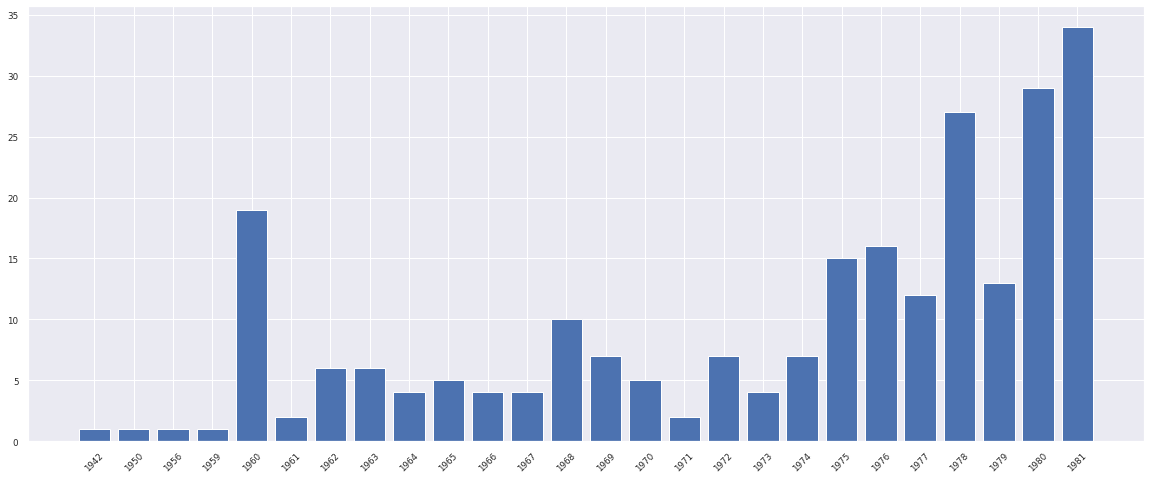

In [ ]:
count_year={}
min_year=df.year_produced.min()
max_year=1982
for num in range(min_year.astype(int),max_year):
  df_year=df[df.year_produced==num]
  count=df_year.shape[0]
  if count>0:
    count_year[num]=count
years = list(count_year.keys())
sum_year = list(count_year.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.bar(range(len(count_year)), sum_year, tick_label=years)
plt.show()

We see 2 things:

1. those kind of cars are very rare , and maybe that's is why they are expensive .
2.in most years there are enough vehicles to deduce necessary data

But wait, is every car in these years necessarily an expensive car?
Let's see what is the average kilometer that each vehicle travels each year and from that we will compare and try with what the condition of the vehicles is between the years 1942-1982

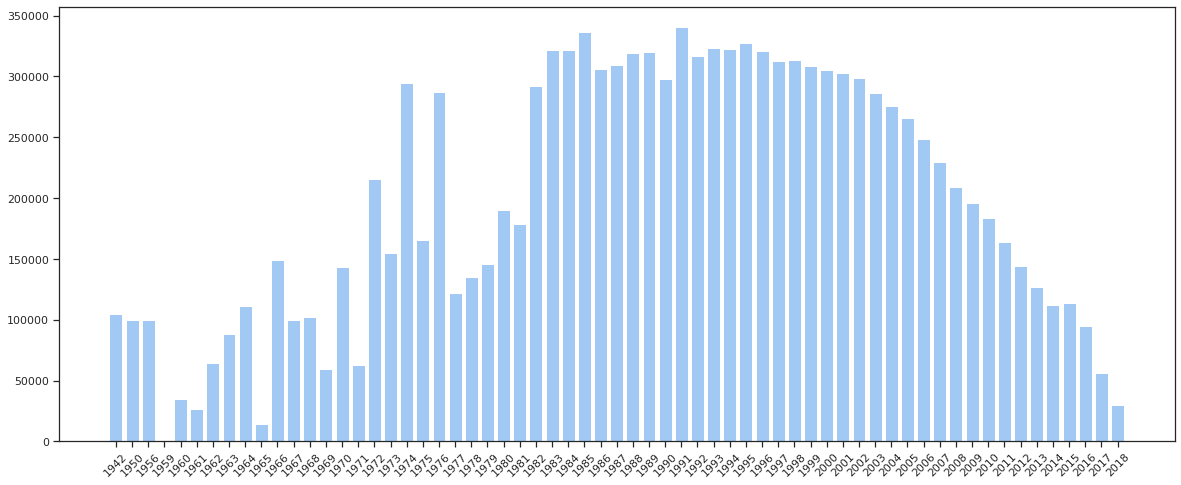

In [ ]:
km_year={}
min_year=df.year_produced.min()
max_year=df.year_produced.max()
for num in range(min_year.astype(int),max_year.astype(int)):
  df_year=df[df.year_produced==num]
  mean_km=df_year.odometer_value.mean()
  if mean_km>0:
    km_year[num]=mean_km
years = list(km_year.keys())
sum_year = list(km_year.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.bar(range(len(km_year)), sum_year, tick_label=years)
plt.show()

So really we see according to this graph that the cars between the years 1942-1982 are relatively preserved, that mean, that their mileage is relatively low for their years.

One thing that emerges from this is whether, even in these years, the kilometers traveled by a car really affect their price.

Le'ts checks this:
We will check if there is a corraltion between the cars kilometer and there price.

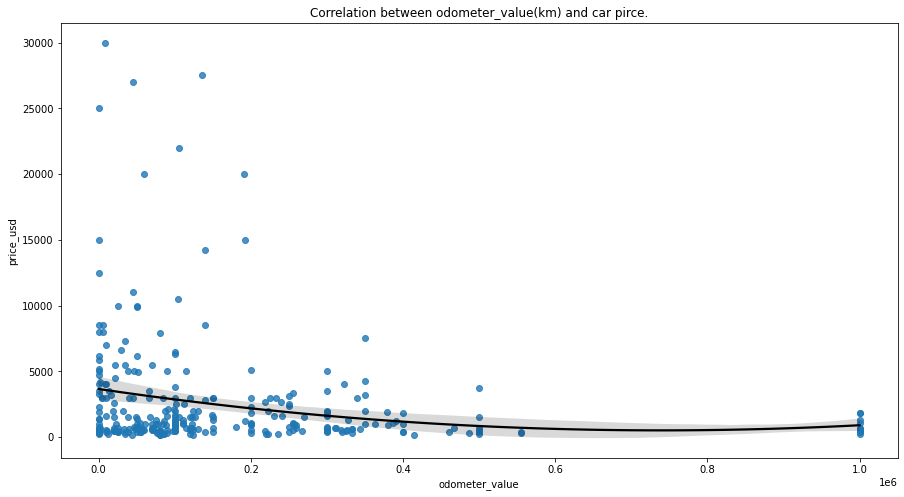

In [ ]:
not_old_cars= df["year_produced"] <1983
df_old_cars = df.where(not_old_cars).dropna()
plt.figure(figsize=(15,8))
plt.title('Correlation between odometer_value(km) and car pirce.')
ax = sns.regplot(x="odometer_value", y="price_usd", data=df_old_cars, line_kws={"color": "black"},order=2)

And really even here, even though these are very old vehicles, we see that the mileage of the vehicle has an effect on the price and we even see clearly from the graph that the most expensive vehicles in these years are vehicles with very low mileage and all the other vehicles with high mileage are not that expensive.

Among the most important questions that can help any buyer is also what type of vehicles are kept for the longest time and also which of these companies have the highest average price,                                    
So that if anyone who buys a car wants to keep it for a long time, he knows which company he should buy the most

{'LADA': 4, 'УАЗ': 5, 'Opel': 14, 'Москвич': 33, 'Dacia': 1, 'ВАЗ': 62, 'Fiat': 1, 'Ford': 13, 'Rover': 1, 'Volkswagen': 25, 'Audi': 7, 'ЗАЗ': 5, 'Toyota': 1, 'ГАЗ': 77, 'Volvo': 2, 'Pontiac': 1, 'Nissan': 3, 'BMW': 4, 'Mazda': 1, 'Land Rover': 1, 'Skoda': 1, 'Honda': 1, 'Mercedes-Benz': 29, 'Chrysler': 1}


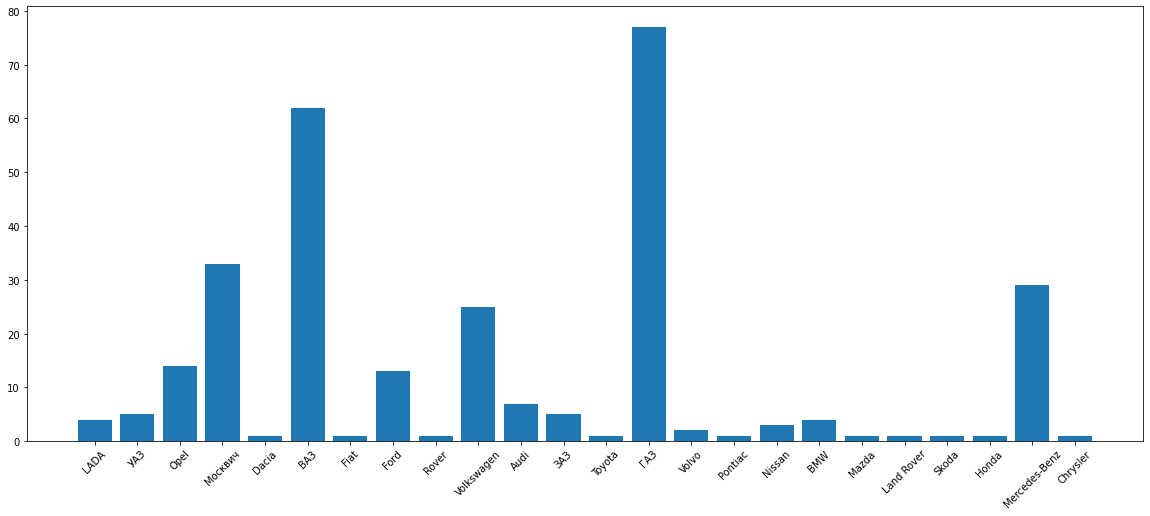

In [ ]:
old_cars_company={}
for x in df_old_cars["manufacturer_name"]:
  if x in old_cars_company:
    old_cars_company[x]+=1
  else:
    old_cars_company[x]=1
print(old_cars_company)
cars_comp = list(old_cars_company.keys())
number = list(old_cars_company.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.bar(range(len(old_cars_company)), number, tick_label=cars_comp)
plt.show()

From this graph we clearly see Mercedes, Volkswagen, Москвич, BA3, RA3
They are the vehicles that have the most vehicles between the years 1942-1982, so it may be possible to conclude that they are the vehicles that are kept the longest.

From those 5 compa whice is the expensive

Text(0.5, 1.0, 'The effect of color on sales speed')

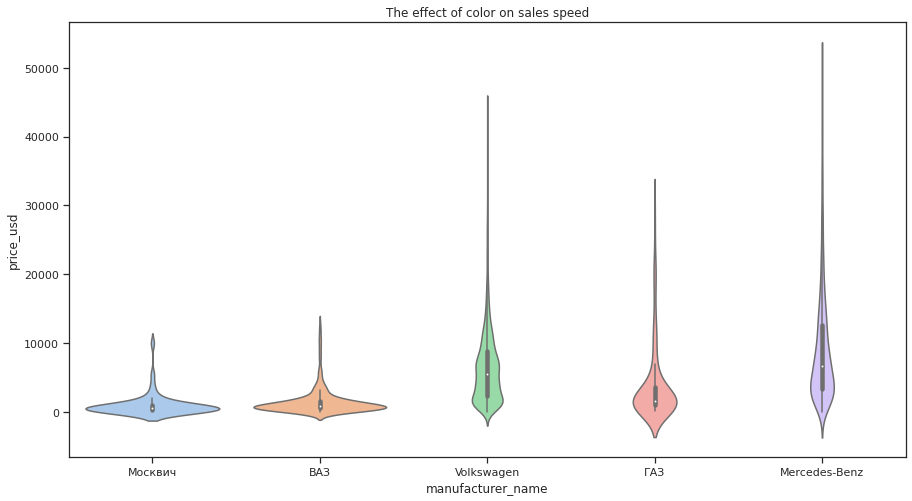

In [ ]:
li=df["manufacturer_name"]=="Mercedes-Benz"
re=df["manufacturer_name"]=="Москвич"
ma=df["manufacturer_name"]=="Volkswagen"
pe=df["manufacturer_name"]=="ГАЗ"
ci=df["manufacturer_name"]=="ВАЗ"
df_fastest_sell = df.where(li|re|ma|pe|ci).dropna()
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.violinplot(x="manufacturer_name", y="price_usd",data=df_fastest_sell)
plt.title('The effect of color on sales speed')

now lets go back to explore things that will help all ...

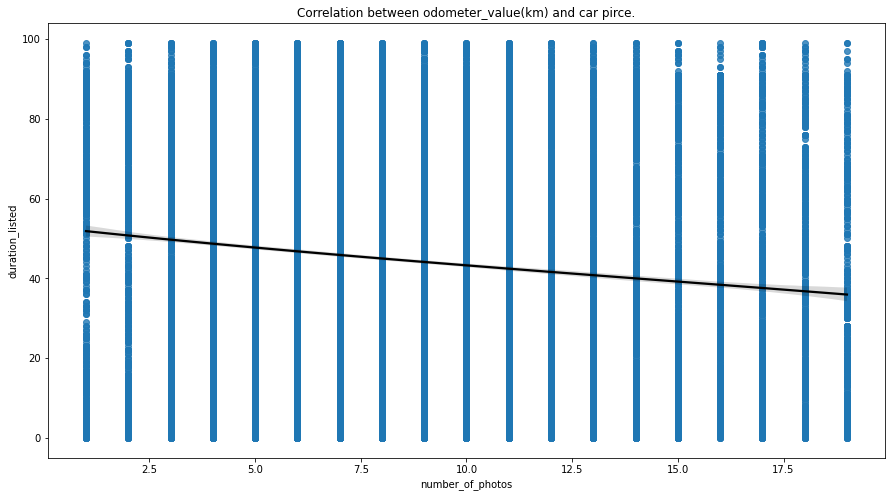

In [ ]:
under_1000=df["duration_listed"]<100
under_40_pho=df["number_of_photos"]<20
df_under_1000=df.where(under_1000 & under_40_pho).dropna()
plt.figure(figsize=(15,8))
plt.title('Correlation between odometer_value(km) and car pirce.')
ax = sns.regplot(x="number_of_photos", y="duration_listed", data=df_under_1000, line_kws={"color": "black"},order=3)

In [67]:
ten_most_popular_companies = df['manufacturer_name'].value_counts().index.tolist()[0:10]
ten_most_popular_companies

['Volkswagen',
 'Opel',
 'BMW',
 'Ford',
 'Renault',
 'Audi',
 'Mercedes-Benz',
 'Peugeot',
 'Citroen',
 'Nissan']

In [ ]:
df_popular_companies = df[df['manufacturer_name'].isin(ten_most_popular_companies)]

df_popular_companies.head()

Text(0.5, 1.0, 'average price by city')

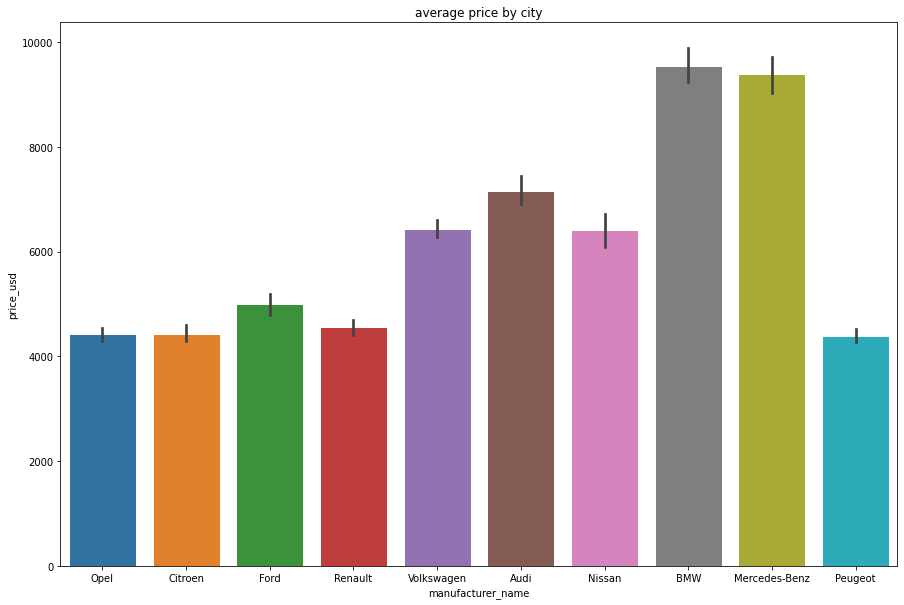

In [69]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'manufacturer_name', y = 'price_usd' , data = df_popular_companies, edgecolor = 'w').set_title('average price by city')

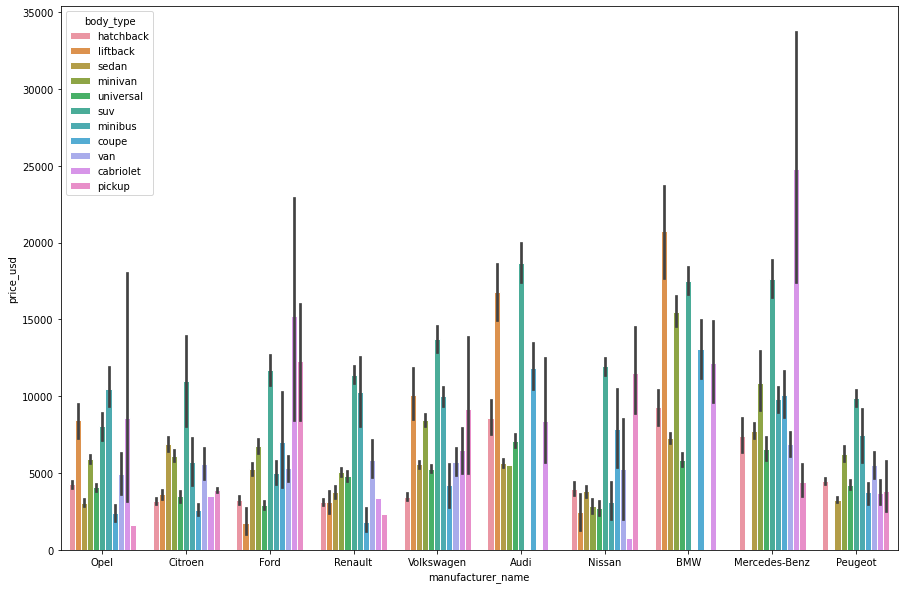

In [73]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'manufacturer_name', y = 'price_usd' , hue = "body_type", data = df_popular_companies, edgecolor = 'w')

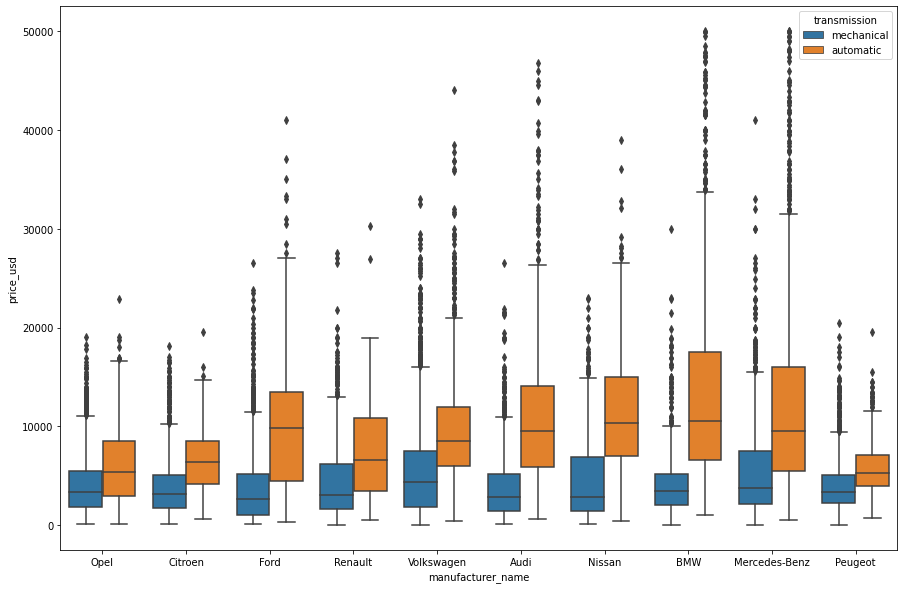

In [75]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'manufacturer_name', y = 'price_usd' , hue = "transmission", data = df_popular_companies)

In [ ]:
ten_most_popular_models = df['model_name'].value_counts().index.tolist()[0:3]
ten_most_popular_models

In [ ]:

for car in ten_most_popular_companies:
  df_car=df[df.manufacturer_name==car]
  popular_model = df['model_name'].value_counts().index.tolist()[0:3]

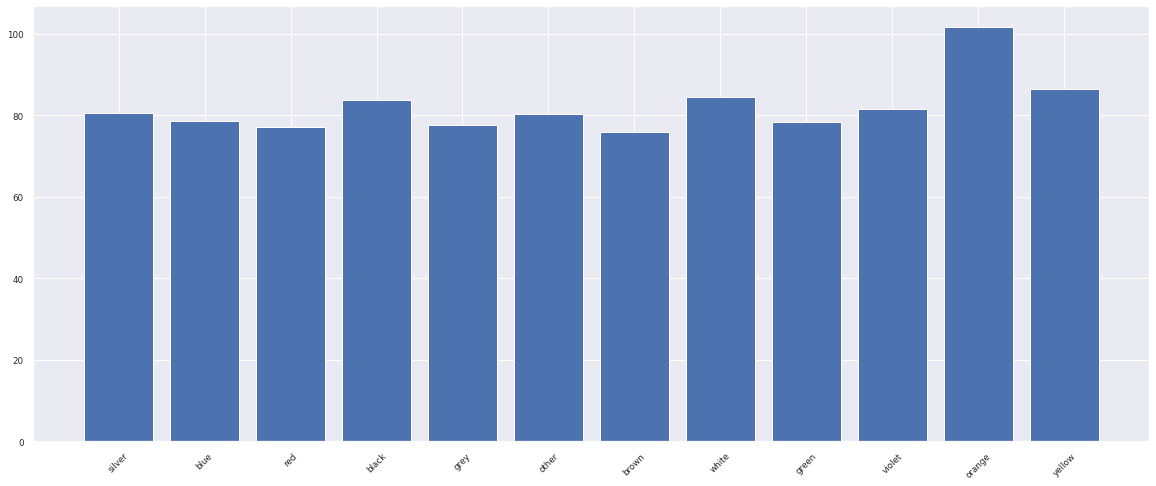

In [ ]:
color_avg={}
colors=list(df.color.unique())
for color in colors:
  df_color=df[df.color==color]
  mean=df_color.duration_listed.mean()
  color_avg[color]=mean
list_colors = list(color_avg.keys())
list_duration = list(color_avg.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.bar(range(len(color_avg)), list_duration, tick_label=list_colors)
plt.show()

Let's see the prices of the cars

Text(0.5, 1.0, 'cars Price avg=6507')

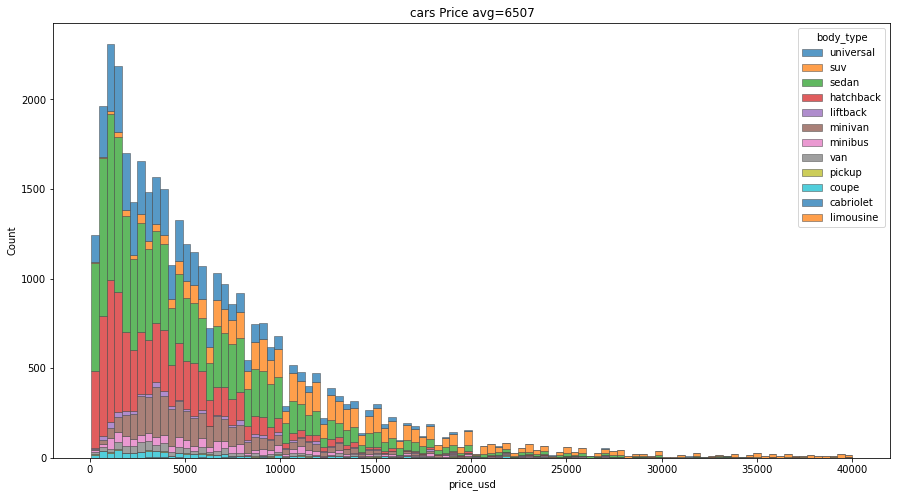

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot( df, x="price_usd", hue="body_type", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

# get the mean and the standard devation value of home price
mean = df['price_usd'].mean()
plt.title(r'cars Price avg='+str(round(mean)))

we see that the avg price is 6640, and we see that as soon as the price starts to rise there are fewer vehicles.
Also we see that the amount of cars that cost more then 20000 is low.

le'ts see the correlation between the price and the odometer_value(km) .

Now let's see the average price for every year

We can see that starting from 1982 there is an increase from year to year in car prices, which means that starting from 1982 the price of the car is affected by the year. Before 1982 there is no clear correlation between car prices per year.

Now let's see the impect of the engine_capacity on the price

3D graph that shows correlation between year_product,odometer_value and 
price.

Text(0.5, 0.92, 'Correlation between year_product, nodometervalue and pirce.')

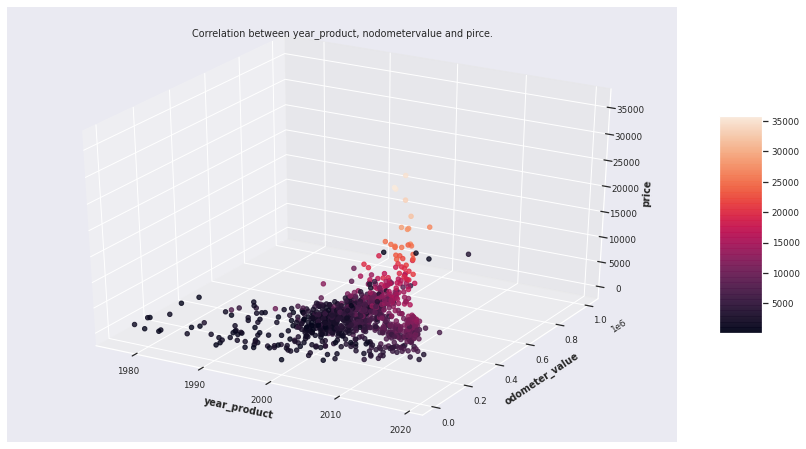

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (15, 8))
ax = plt.axes(projection ="3d")

df_plot = df.head(1000);
x = df_plot["year_produced"]
y = df_plot["odometer_value"]
z = df_plot["price_usd"]
sctt = ax.scatter3D(x, y, z, c = z ,alpha = 0.8 )


ax.set_xlabel('year_product', fontweight ='bold')
ax.set_ylabel('odometer_value', fontweight ='bold')
ax.set_zlabel('price', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5,  aspect = 5)
plt.title('Correlation between year_product, nodometervalue and pirce.')

Let's see which color sells the fastest

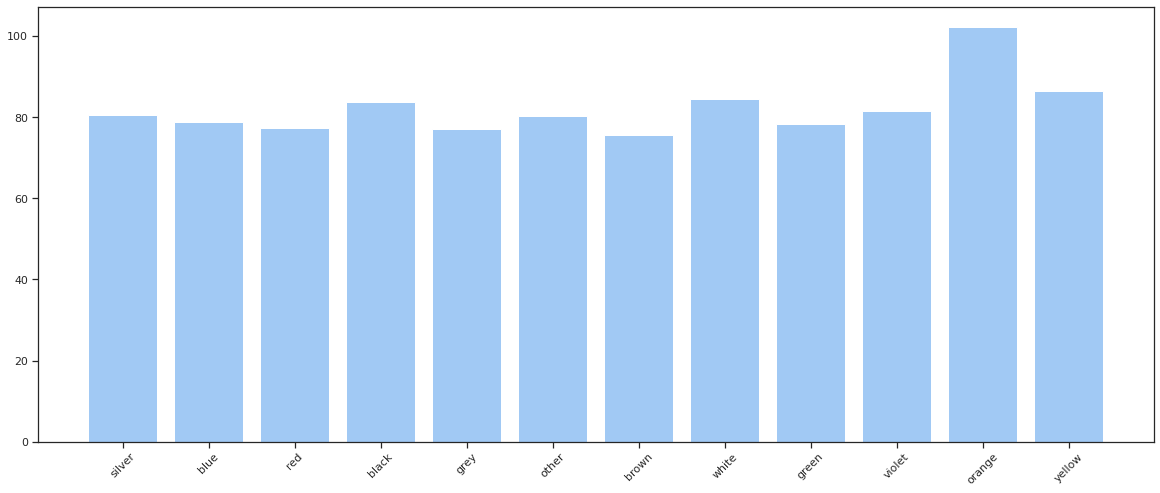

In [ ]:
color_avg={}
colors=list(df.color.unique())
for color in colors:
  df_color=df[df.color==color]
  mean=df_color.duration_listed.mean()
  color_avg[color]=mean
list_colors = list(color_avg.keys())
list_duration = list(color_avg.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.bar(range(len(color_avg)), list_duration, tick_label=list_colors)
plt.show()

We see that the color does not have that much of an effect on the speed of the sale, except for the color orange, where we do see that it takes longer than the other colors to be sold

Text(0.5, 1.0, 'The effect of color on the price')

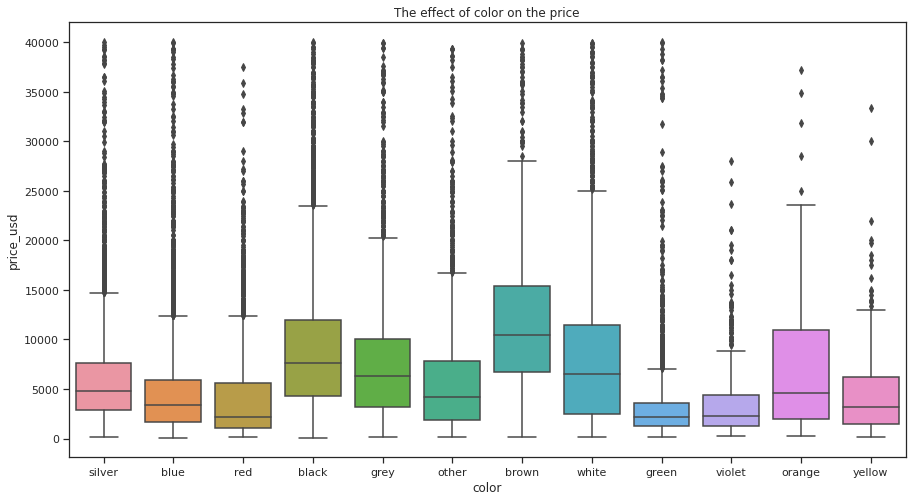

In [ ]:
# drawing the plot
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="color", y="duration_listed",  hue="transmission", data=df)
plt.title('The effect of color on sales speed')

we can see from the graph that the brown color is the most expensive,while the green color less expensive.

lest draw a pie chart that describes the distribution of different cars body

Text(0.5, 1.0, 'Distribution of different house types')

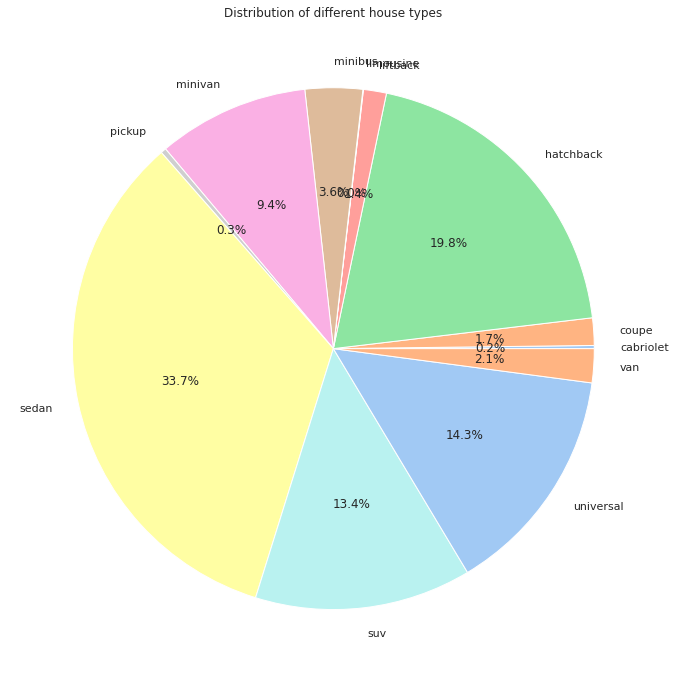

In [ ]:
data = df.groupby("body_type").count()
labels  = data.index.values.tolist()
data_list =  data['manufacturer_name'].tolist()

plt.figure(figsize=(18,12))
plt.pie(data_list, labels = labels, autopct='%.1f%%')
plt.title('Distribution of different house types')

The thing that can be learned from this graph is that most of the vehicles that are sold are private vehicles: such as hatchback, sedan, SUV, universal.
And then it's more commercial vehicles like minivans, buses, etc.

Let's see if the fact that the seller is willing to exchange affects the price according to the type of vehicle

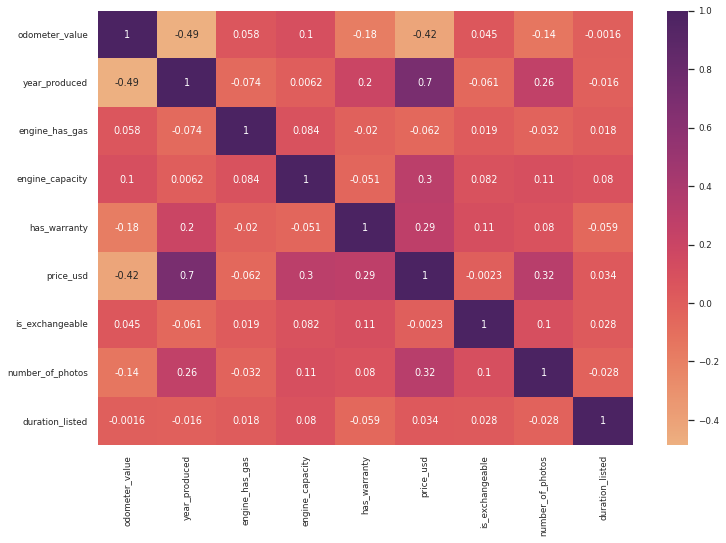

In [ ]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap = sns.color_palette("flare", as_cmap=True))

As you can see, we got a pretty strong correlation of 0.72 between the year of manufacture and the price of the vehicle, but the year of manufacture is not enough to predict the price of the vehicle.
So the explanation for this is that only numerical values ​​were taken, so we know that there are other non-numerical characteristics that affect the price of the vehicle, such as the vehicle model and the company, which also have a strong impect on the price

## **I will add more graphs to visualize the data**

# **PCA**

let's us the PCA methood to reduce our data dimension to better understand our data and to see if the is a correlation in our data to now whice model to built for our data.

First let's use StandardScaler to normalize the data and labelEncoder to make colums numeric, also lets seperate the data (features,target)

In [ ]:
df1=df
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
print(category_columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

classes = df1['price_usd'].reset_index(drop=True)

features = df1.drop(['price_usd'], axis = 1) 
features_norm = StandardScaler().fit_transform(features)

Now we will define the PCA algorithm

In [ ]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(features_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
principalDf["price"] = classes

pca.explained_variance_ratio_ 

array([0.14091343, 0.12249759])

First, what are the numbers we got?
What we got are two numbers that represent one column and the other so that 14% represents the difference (variance) in price according to column 1 and 12.2% represents the difference according to column 2

Now that's weird becase according to the heatmap we got 72% correlation between the year_produced and the price_usd and 42% correlation between odometer_value and price_usd so its surprising that the pca didnt find a coraltion that the variance with the price is more then 14%.

Now lets plot the impect of the to colums on the price , but in order to plot it we will add a colum of the price is bins

In [ ]:
principalDf['pirce_bins'] = pd.cut(x=principalDf['price'], bins=[2000, 4500, 7000, 10000, 14000, 19000, 26000, 35000, 46000, 62000, 150000],
                    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

principalDf.head()

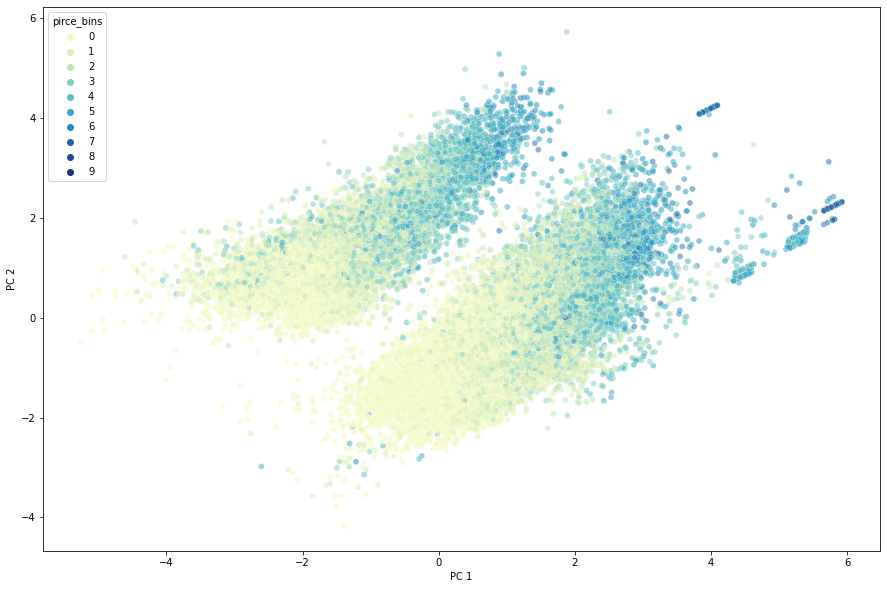

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot( data=principalDf, x="PC 1", y="PC 2", hue="pirce_bins", palette="YlGnBu" , alpha = 0.5  ) 

we can see a correlation between the increase of PC 1 and PC 2 value to the increase in the price value.So we will use it when we are buliding our models becasue we can see a that the 2 main components explain us the variance in price.


# **ANN-classify the time range of the sale**

we will import from pytorch

In [33]:
import torch
import torch.nn as nn
import numpy as np
import torch.functional as F

In [ ]:
df_ann=df

In [ ]:
df_ann

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed
0,45,763,0,8,2447,54,2,0,1,19,10,0,2,0,1547,0,8,16
1,45,763,0,1,3953,46,2,0,1,24,10,0,2,0,1026,1,11,83
2,45,519,0,7,5333,45,2,0,1,19,9,0,2,0,715,1,3,151
3,45,609,1,1,236,43,2,0,1,24,8,0,2,0,1483,1,8,86
4,45,664,0,0,3794,45,2,0,1,19,10,0,2,0,599,1,13,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,8,86,0,8,3953,44,2,0,1,29,8,0,2,1,707,1,4,301
38527,8,765,1,1,4389,48,0,0,0,16,2,0,2,1,996,1,3,317
38528,8,86,0,1,6024,44,2,0,1,29,8,0,2,1,932,0,2,369
38529,8,765,1,0,331,45,2,0,1,14,6,0,2,1,894,1,6,490


### **We will transfer the sales time to a discrete value so that we predict the sales range for each vehicle**

In [ ]:
df_ann

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,490


In [ ]:
from sklearn.preprocessing import LabelEncoder
var_columns = [c for c in df_ann if c not in "duration_listed"]
encoder = LabelEncoder()
for x in var_columns:
  encoder.fit(df_ann[x])
  df_ann[x]= encoder.transform(df_ann[x])

In [ ]:
print('Shape of all dataset: {}'.format(df.shape))

var_columns = [c for c in df_ann if c not in "duration_listed"]
x=df_ann.loc[:,var_columns]
y = df_ann.loc[:,'duration_listed']
print(x.shape)
print(y.shape)

Shape of all dataset: (38473, 18)
(38473, 17)
(38473,)


Let's separate to train and valid and normalize the data.
also we will use labelencoder to make all colums numeric

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(30778, 17)
(30778,)
(7695, 17)
(7695,)


In [ ]:
y_train=y_train.values.reshape(30778,1)
y_valid=y_valid.values.reshape(-1,1)
print(y_train.shape)

(30778, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
x_scalar=StandardScaler()
x_train = x_scalar.fit_transform(x_train)
x_valid = x_scalar.transform(x_valid)

lets make the data to be torch

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float)
x_valid = torch.tensor(x_valid, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_valid = torch.tensor(y_valid, dtype=torch.float)

**Neural network structure**

In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(x_train.shape[1],1)
    
    
  def forward(self,x):
    x=self.layer1(x)
    return x

To use CrossEntropyLoss() we have to make the y_train to be **dtype=torch.long**

In [ ]:
y_train = torch.tensor(y_train,dtype=torch.long)

<ipython-input-75-6d63635beb05>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.long)


Let's define the model the optimizer and the loss.

We will use the crossEntropy because we have multi class classifiction

In [ ]:
#import torch.optim as optim
model1 = NN()
optimizer= torch.optim.SGD(model1.parameters(),lr=0.3)
loss_fn=nn.MSELoss()

train the model

In [ ]:
epochs=101
for i in range(epochs):
  #initialize the model parameter
  #optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model1(x_train)
  loss=loss_fn(output,y_train)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%10==0):
    print(f"epochs: {i}......loss:{loss}")

We see that we get very good results on the training set and every EPOCH there is an improvement of the error.

Let's see what results we get on our test set.

In [ ]:
test_inputs = x_valid
test_outputs = model1(test_inputs)
test_loss = loss_fn(test_outputs, y_valid)

print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 14767.8320


In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    #for i,x in enumerate(x_valid):
    outputs = model1(x_valid)
        # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    n_samples += y_valid.size(0)
    n_correct += (predicted == (y_valid)).sum().item()
    
acc= 100.0 * n_correct / n_samples
print(f'accuracy={acc}')

We got an accuracy level of 94.33. This is a very good result and we see that our neural network overall does a good job in predicting the car's sale time.

# let's comper it to Multi-layer Perceptron (MLP) from sklearn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
clf = MLPClassifier(random_state=1,activation='relu',batch_size=100, max_iter=550,learning_rate='adaptive',hidden_layer_sizes=[100],verbose=False)
clf.fit(x_train, y_train)
pre3=clf.predict(x_train)
print(accuracy_score(y_train,pre3))

# **classify the company**

In [43]:
df1=df
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
print(category_columns)

[]


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

In [45]:
from sklearn.model_selection import train_test_split
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df if c not in ["model_name","manufacturer_name"]]
target_colums=[c for c in df if c in ["model_name","manufacturer_name"]]
x=df.loc[:,var_columns]
y1 = df.loc[:,"model_name"]
y2=df.loc[:,"manufacturer_name"]
x_train, x_valid, y1_train, y1_valid, y2_train, y2_valid = train_test_split(x, y1,y2, test_size=0.2, random_state=42)
print(x_train.shape)
print(y1_train.shape)
print(x_valid.shape)
print(y1_valid.shape)
#print(y2_train.shape)
#print(y2_valid.shape)

Shape of all dataset: (38473, 18)
(30778, 16)
(30778,)
(7695, 16)
(7695,)


In [46]:
from sklearn.preprocessing import StandardScaler
x_scalar=StandardScaler()
x_train = x_scalar.fit_transform(x_train)
x_valid = x_scalar.transform(x_valid)

In [ ]:
print(x_train)

In [ ]:
y_train_combined = np.hstack((y1_train.values.reshape(-1,1), y2_train.values.reshape(-1,1)))
y_test_combined = np.hstack((y1_valid.values.reshape(-1,1), y2_valid.values.reshape(-1,1)))

# **Decision tree**

In [28]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold
model_tree = RandomForestClassifier(max_depth=15, class_weight='balanced',ccp_alpha=0.01) #ccp_alpah is the

model_tree.fit(x_train, y2_train)
pre=model_tree.predict(x_valid)
print(model_tree.get_params())

{'bootstrap': True, 'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [29]:
print(accuracy_score(y1_valid,pre))

0.0009096816114359974


In [ ]:
arr = y_valid.to_numpy()

In [ ]:
print(list(pre))
print(list(y2_valid))
print(list(y1_valid))
print(len(list(pre)),len(list(y1_valid)))

In [ ]:
for x,y in zip(arr,pre):
  if x[1]==y[1] and x[0]==y[0]:
    print("yes")

yes
yes
yes
yes
yes
yes
yes


In [47]:
x_train = torch.tensor(x_train, dtype=torch.float)
x_valid = torch.tensor(x_valid, dtype=torch.float)
y1_train = torch.tensor(y1_train, dtype=torch.float)
y1_valid = torch.tensor(y1_valid.values, dtype=torch.float)

In [48]:
class classifier_MODEL(nn.Module):
    def __init__(self):
        super(classifier_MODEL, self).__init__()
        self.layer1 = nn.Linear(16, 28) 
        self.layer2 = nn.Linear(28, 14)
        self.layer3 = nn.Linear(14, 7)
        self.layer4= nn.ReLU()
    def forward(self, x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.layer4(x)
        return x

In [49]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [50]:
model=classifier_MODEL().to(device)
criterion =nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

RuntimeError: ignored

In [ ]:
y_train = torch.tensor(y_train,dtype=torch.long)

In [ ]:
for epoch in range(1000):
    #forward pass:
    output=model(x_train)
    loss=criterion(output,y_train)
    #backward pass:
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # make the updates for each parameter
    if(epoch+1)%50==0:
      print(f'epoch:{epoch+1}: loss={loss:.8f}')

# **Building models for car price prediction**

In [125]:
df['manufacturer_name'].value_counts()
print(df['manufacturer_name'].unique().size)
print(df['manufacturer_name'].value_counts())

55
Volkswagen       4240
Opel             2759
BMW              2607
Ford             2563
Renault          2491
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1560
Nissan           1356
Mazda            1327
Toyota           1246
Hyundai          1116
Skoda            1056
Kia               912
Mitsubishi        886
Fiat              822
Honda             797
Volvo             720
ВАЗ               481
Chevrolet         435
Chrysler          410
Seat              303
Dodge             296
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery  

First we will check what are the non numeric colums

In [126]:
df1=df
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
print(category_columns)

['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_has_gas', 'engine_type', 'body_type', 'has_warranty', 'state', 'drivetrain', 'is_exchangeable']


We will use labelEncoder to make the non numeric to numeric

In [127]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

<ipython-input-127-2c72c977027e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[x]= encoder.transform(df[x])


split our data to train and test 

In [128]:
from sklearn.model_selection import train_test_split
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df if c not in ["price_usd"]]
x=df.loc[:,var_columns]
y = df.loc[:,'price_usd']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

Shape of all dataset: (38473, 18)
(30778, 17)
(30778,)
(7695, 17)
(7695,)


Now we will use 5 model to predict the car price and we will comper

# **Linear Regression**

We will import the models from Sklearn.
The first model is linear regression

In [129]:
from sklearn.linear_model import LinearRegression

Linear = LinearRegression()
Linear.fit(x_train,y_train)
Linear.score(x_valid,y_valid)

0.6634560302834166

# **Gradient Boosting**

An acceptable model to use, when you want to predict linear information.
For each training example in this model we try to learn and correct the previous predictions

In [130]:
import xgboost

grad = xgboost.XGBRegressor().fit(x_train, y_train)
grad.score(x_valid,y_valid)

[15:39:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8911948807059711

# **Decision Trees-Regression**

tree regression

In [131]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt = dt.fit(x_train,y_train)
dt.score(x_valid,y_valid)

0.8279683310298233

# **Random Forest-Regression**

random forest - using multiple trees

In [132]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest = random_forest.fit(x_train,y_train)
random_forest.score(x_valid,y_valid)

0.9147658364953677

# **SVR Regression**

As we know, every training sample can be looked at as a vector, so that in the end it will be possible to use SVR so that its purpose is to give the linear classifier on the training group when they are vectors.

In [ ]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf')
model_svr.fit(x, y)
model_svr.score(x_valid,y_valid)

# **Comparing the Models with Mean squared error**

In addition we will use MSE so that it will also tell us which model is the best.
Basically this method tells us what is the distance/difference of our prediction from the original price, i.e. what is the variance.

In [ ]:
from sklearn.metrics import mean_squared_error
#linear 
y_pred=Linear.predict(x_valid)
print(f' linear regression mse :{mean_squared_error(y_valid, y_pred)}')
#Gradient Boosting
y_pred=grad.predict(x_valid)
print(f' Gradient Boosting mse :{mean_squared_error(y_valid, y_pred)}')
#Decision Trees-Regression
y_pred=dt.predict(x_valid)
print(f' Decision Trees mse :{mean_squared_error(y_valid, y_pred)}')
#Random Forest-Regression
y_pred=random_forest.predict(x_valid)
print(f' random forest mse :{mean_squared_error(y_valid, y_pred)}')
#svr mse:

 linear regression mse :14235973.234473232
 Gradient Boosting mse :4602544.996286446
 Decision Trees mse :7615849.548801982
 random forest mse :3568458.4790152474


We see that the best model is the random forest with the lower loss of 3629887

# **Compering real price and predction**

We will take the best model (random forest) and we will comper the predicted price to the real price 

In [ ]:
import random
var_columns = [c for c in df if c not in ["price_usd"]]
pre=df.loc[:,var_columns]
x=pre.loc[150]
x = pre.iloc[150,:].to_frame().T

for i in range (5):
  x=random.randint(0,x_valid.shape[0])
  featurs=pre.iloc[x,:].to_frame().T
  print(f'the predicted price: {random_forest.predict(featurs)[0]} , the real price: {df.loc[x].price_usd}')

the predicted price: 3371.1198999999997 , the real price: 3650.0
the predicted price: 5889.82 , the real price: 1600.0
the predicted price: 5428.186699999999 , the real price: 12300.0
the predicted price: 477.76990000000006 , the real price: 7899.0
the predicted price: 2638.5907999999995 , the real price: 2100.0


# **Let's explain our result-explain how each feature affects the model**

Now that we have all the models let's take the best model and explore it.
We would like to check which features affected the model, and for that we will use SHAP

# **SHAP vaules**

SHAP values explain how each feature affects the model, and allows analysis for the dataset 

In [133]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.8 MB/s eta 0:00:00


In [137]:
!pip install --upgrade shap

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [135]:
import shap
explainer = shap.Explainer(random_forest)
shap_values = explainer(x_valid)

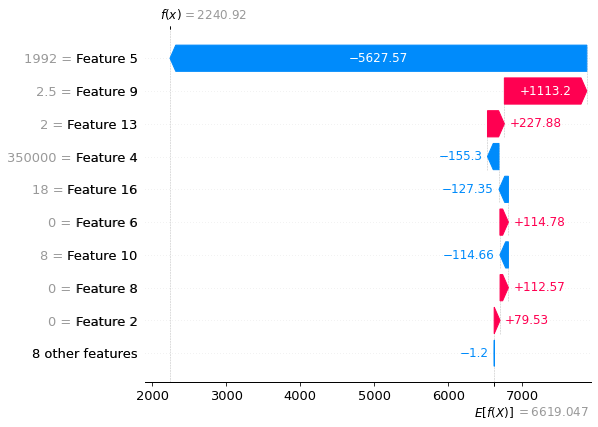

In [138]:
idx = 3
exp = shap.Explanation(shap_values.values, shap_values.base_values[0][0], shap_values.data)
shap.plots.waterfall(exp[3])

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Exception: ignored

In [ ]:
shap.waterfall_plot(shap_values.values, shap_values.base_values[0][0], shap_values.data)

AttributeError: ignored

# **Summary**